<a href="https://colab.research.google.com/github/darshikapanwar009/Machine-Learning/blob/main/AND_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 1.046823
Epoch 1000, Loss: 0.262291
Epoch 2000, Loss: 0.058081
Epoch 3000, Loss: 0.026570
Epoch 4000, Loss: 0.016278
Epoch 5000, Loss: 0.011458
Epoch 6000, Loss: 0.008729
Epoch 7000, Loss: 0.006997
Epoch 8000, Loss: 0.005809
Epoch 9000, Loss: 0.004949

Predictions:
[0 0] → 0
[0 1] → 0
[1 0] → 0
[1 1] → 1


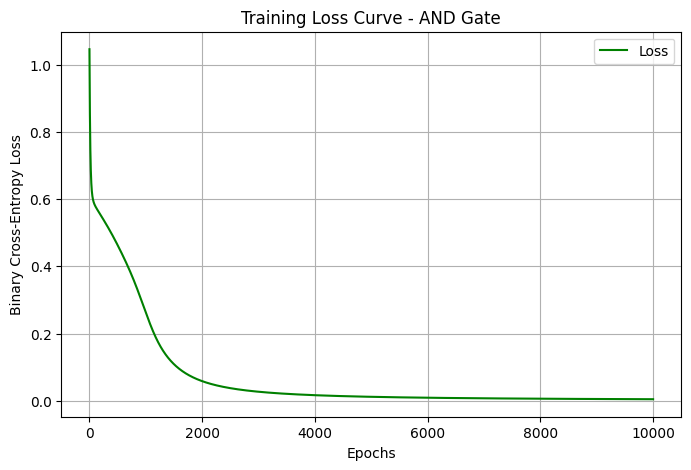

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Binary Cross Entropy loss
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-9  # for numerical stability
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Neural Network for AND gate
class NeuralNetAND:
    def __init__(self, input_size, hidden_size, lr=0.1, epochs=10000):
        self.lr = lr
        self.epochs = epochs
        self.loss_history = []

        # Weight & bias initialization
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, 1)
        self.b2 = np.zeros((1, 1))

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, x, y, output):
        m = y.shape[0]
        dz2 = output - y
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.w2.T) * sigmoid_deriv(self.z1)
        dw1 = np.dot(x.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update weights
        self.w1 -= self.lr * dw1
        self.b1 -= self.lr * db1
        self.w2 -= self.lr * dw2
        self.b2 -= self.lr * db2

    def train(self, X, Y):
        for i in range(self.epochs):
            output = self.forward(X)
            self.backward(X, Y, output)
            loss = binary_cross_entropy(Y, output)
            self.loss_history.append(loss)
            if i % 1000 == 0:
                print(f"Epoch {i}, Loss: {loss:.6f}")

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)

    def plot_loss(self):
        plt.figure(figsize=(8, 5))
        plt.plot(self.loss_history, label="Loss", color='green')
        plt.xlabel("Epochs")
        plt.ylabel("Binary Cross-Entropy Loss")
        plt.title("Training Loss Curve - AND Gate")
        plt.grid(True)
        plt.legend()
        plt.show()

# Input and Output for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

# Train model
model = NeuralNetAND(input_size=2, hidden_size=2, lr=0.1, epochs=10000)
model.train(X, Y)

# Predict
preds = model.predict(X)
print("\nPredictions:")
for i in range(len(X)):
    print(f"{X[i]} → {preds[i][0]}")

# Plot loss graph
model.plot_loss()
